In [1]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import pickle
import shap
from keras.utils import to_categorical
from keras.layers import Dense,RNN,LSTM,Activation,Dropout,Embedding
from keras.models import Sequential
import tensorflow as tf
import tensorflow.compat.v1.keras.backend as K
tf.compat.v1.disable_eager_execution()

shap.initjs()

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
columns_to_use = [
    'category_id',
#  'views',
#  'likes',
#  'dislikes',
#  'comment_count',
 'pub_day_of_the_week',
 'pub_day',
 'pub_hour',
#  'dislikes/likes',
#  'likes/views',
#  'dislikes/views',
#  'comment_count/views',
 'n_of_tags',
 'title_length',
 'title_n_of_words',
 'title_capital_letters',
 'title_capital_letters_percent',
 'title_small_letters',
 'title_small_letters_percent',
 'title_punctuation',
 'title_punctuation_percent',
 'title_n_of_emojis',
 'desc_length',
 'desc_n_of_words',
 'desc_capital_letters',
 'desc_capital_letters_percent',
 'desc_small_letters',
 'desc_small_letters_percent',
 'desc_punctuation',
 'desc_punctuation_percent',
 'desc_n_of_urls',
 'desc_n_of_emojis',
 'isFacebook',
 'isTwitter',
 'isInstagram',
 'mean_h',
 'mean_s',
 'mean_v',
 'std_h',
 'std_s',
 'std_v',
 'entropy',
 'avg_texts_coordX',
 'avg_texts_coordY',
 'ocr_sentiment_compound',
 'Sad',
 'Fear',
 'Angry',
 'Happy',
 'Neutral',
 'Surprise',
 'people',
 'faces',
 'trending'
]

In [3]:
df = pd.read_csv('../../our_data/Etap5/Etap3/all_for_FI_without_outliers.csv')
scaler = pickle.load(open("../Etap5/scaler_without_outliers.pkl", 'rb'))

from sklearn.model_selection import train_test_split
# for col in df.columns:
#     temp = df[col].isna()
#     print(f"{col}:, {temp.any()} {temp.sum()}")

X_train, X_test, y_train, y_test = train_test_split(df.loc[:,~df.columns.isin(['trending'])],
#                                                     df.loc[:,columns_to_use],
                                                    df['trending'], 
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=df['category_id']
                                                   )

print(f'X_train: ', X_train.shape)
print(f'y_train: ', y_train.shape)
print(f'X_test: ', X_test.shape)
print(f'y_test: ', y_test.shape)

# Do Shapa
sample_test_set = shap.sample(pd.concat([X_test,y_test],axis=1), 8000)
sample_train_set = shap.sample(X_train, 150) 

columns_not_to_standarize = [
    'video_id', 'category_id', 'trending',
    'isFacebook', 'isTwitter', 'isInstagram'
]

sample_test_set_not_standarized = sample_test_set.copy()
sample_test_set_not_standarized.loc[:, sample_test_set_not_standarized.columns.difference(columns_not_to_standarize)] = scaler.inverse_transform(sample_test_set_not_standarized.loc[:, sample_test_set_not_standarized.columns.difference(columns_not_to_standarize)].values)
sample_test_set_not_standarized[:3]

X_train:  (10811, 54)
y_train:  (10811,)
X_test:  (4634, 54)
y_test:  (4634,)


,video_id,category_id,views,likes,dislikes,comment_count,pub_day_of_the_week,pub_day,pub_hour,dislikes/likes,likes/views,dislikes/views,comment_count/views,n_of_tags,title_length,title_n_of_words,title_capital_letters,title_capital_letters_percent,title_small_letters,title_small_letters_percent,title_punctuation,title_punctuation_percent,title_n_of_emojis,desc_length,desc_n_of_words,desc_capital_letters,desc_capital_letters_percent,desc_small_letters,desc_small_letters_percent,desc_punctuation,desc_punctuation_percent,desc_n_of_urls,desc_n_of_emojis,isFacebook,isTwitter,isInstagram,mean_h,mean_s,mean_v,std_h,std_s,std_v,entropy,avg_texts_coordX,avg_texts_coordY,ocr_sentiment_compound,Sad,Fear,Angry,Happy,Neutral,Surprise,people,faces,trending
11925,GAkkKjds00o,28,165223.0,2452.0,265.0,1.0,2.0,9.0,6.0,0.108075,0.014841,0.001604,0.000006,30.0,47.0,7.0,6.0,0.127660,27.0,0.574468,5.0,0.106383,3.469447e-18,776.0,123.0,65.0,0.083763,525.0,0.676546,18.0,0.048969,4.0,0.0,0,0,0,0.228885,0.124931,0.580314,0.305953,0.216951,0.420357,5.926161,109.833333,190.833333,-3.469447e-18,-5.551115e-17,0.0,0.0,0.0,0.0,0.0,89.0,0.0,1
768,QfeMyvCivqE,24,7187.0,72.0,1.0,1.0,4.0,6.0,4.0,0.013889,0.010018,0.000139,0.000139,0.0,24.0,4.0,14.0,0.583333,1.0,0.041667,1.0,0.041667,3.469447e-18,17.0,3.0,2.0,0.117647,0.0,0.000000,1.0,0.058824,0.0,0.0,0,0,0,0.211116,0.121069,0.415276,0.191660,0.217380,0.418833,5.292400,217.000000,106.000000,-3.469447e-18,-5.551115e-17,0.0,0.0,1.0,0.0,0.0,4.0,1.0,0
4931,iqJex_ZWjdI,25,209951.0,1513.0,68.0,223.0,3.0,25.0,13.0,0.044944,0.007206,0.000324,0.001062,27.0,98.0,17.0,22.0,0.224490,56.0,0.571429,2.0,0.020408,3.469447e-18,1277.0,172.0,179.0,0.140172,827.0,0.647612,30.0,0.060298,8.0,0.0,0,0,0,0.446859,0.350695,0.583564,0.346788,0.325867,0.391406,6.720005,76.000000,289.000000,-3.469447e-18,-5.551115e-17,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0


In [4]:
X_train = X_train.loc[:,columns_to_use[:-1]]
X_test = X_test.loc[:,columns_to_use[:-1]]
sample_test_set_not_standarized = sample_test_set_not_standarized.loc[:,columns_to_use]
sample_train_set = sample_train_set.loc[:,columns_to_use[:-1]]
sample_test_set = sample_test_set.loc[:,columns_to_use]

In [5]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("sample_test_set_not_standarized:",sample_test_set_not_standarized.shape)
print("sample_train_set:",sample_train_set.shape)
print("sample_test_set:",sample_test_set.shape)


X_train: (10811, 45)
X_test: (4634, 45)
sample_test_set_not_standarized: (4634, 46)
sample_train_set: (150, 45)
sample_test_set: (4634, 46)


In [6]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset
from torch.autograd import Variable

torch.cuda.is_available()


True

In [7]:
x=torch.tensor(X_train.values) 
y=torch.tensor(y_train.values).unsqueeze(1) 

x_t=torch.tensor(X_test.values) 
y_t=torch.tensor(y_test.values).unsqueeze(1) 


print(x.shape,x.dtype)
print(y.shape,y.dtype)

print(x_t.shape,x.dtype)
print(y_t.shape,y.dtype)


torch.Size([10811, 45]) torch.float64
torch.Size([10811, 1]) torch.int64
torch.Size([4634, 45]) torch.float64
torch.Size([4634, 1]) torch.int64


In [8]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.fc1 =torch.nn.Linear(x.shape[1],5)
        self.fc2 =torch.nn.Linear(5,3)
        self.fc3 =torch.nn.Linear(3,1)
        self.sigmoid=torch.nn.Sigmoid()
    
    def forward(self,x):
        out =self.fc1(x)
        out =self.sigmoid(out)
        out =self.fc2(out)
        out =self.sigmoid(out)
        out =self.fc3(out)
        out= self.sigmoid(out)
        return out
net = Model()


class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()    
        
        self.sigmoid=torch.nn.Sigmoid()
        self.relu = nn.ReLU()        
        self.layer_1 = nn.Linear(x.shape[1], 128) 
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(p=0.2)
        
        self.layer_2 = nn.Linear(128, 128)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(p=0.2)
        
        self.layer_3 = nn.Linear(128, 64)
        self.batchnorm3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(p=0.2)
                
        self.layer_4 = nn.Linear(64, 32)
        self.batchnorm4 = nn.BatchNorm1d(32)
        self.dropout4 = nn.Dropout(p=0.2)
        
        self.layer_out = nn.Linear(32, 1) 
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.layer_1(inputs)
        x = self.batchnorm1(x)
        x = self.dropout(x)
        
        
        x = self.relu(self.layer_2(x))
#         x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.dropout2(x)
        
#         x = self.relu(self.layer_3(x))
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.dropout3(x)
        
        x = self.layer_4(x)
        x = self.batchnorm4(x)
        x = self.dropout4(x)
        
        x= self.sigmoid(self.layer_out(x))
        
        return x
net = binaryClassification()

class Dataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y

    def __getitem__(self,index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)

dataset=Dataset(x,y)
dataset_t=testData(x_t)
train_loader= torch.utils.data.DataLoader(dataset=dataset, batch_size=128, shuffle=True) # load data
test_loader= torch.utils.data.DataLoader(dataset=dataset_t, batch_size=1) # load data

In [9]:
criterion =torch.nn.BCELoss()
optimizer =torch.optim.Adam(net.parameters(), lr=0.001)

In [10]:
num_epochs =80
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs = Variable(inputs.float())
        labels= Variable(labels.float())
#         print("labels:",labels)    
        output = net(inputs)
#         print("output:",output)
        optimizer.zero_grad()
        loss = criterion(output,labels)
        # loss = -(labels * torch.log(output)+ (1-labels) * torch.log(1-output)).mean()
        loss.backward()
        optimizer.step()
    output = (output>0.5).float()
    correct = (output == labels).float().sum()
    print("Epoch {}/{}, loss:{:.3f}, Accuracy: {:.3f}".format(epoch+1,num_epochs,loss.item(),correct/output.shape[0]))

Epoch 1/80, loss:0.733, Accuracy: 0.492
Epoch 2/80, loss:0.629, Accuracy: 0.644
Epoch 3/80, loss:0.644, Accuracy: 0.644
Epoch 4/80, loss:0.694, Accuracy: 0.508
Epoch 5/80, loss:0.564, Accuracy: 0.746
Epoch 6/80, loss:0.608, Accuracy: 0.661
Epoch 7/80, loss:0.673, Accuracy: 0.610
Epoch 8/80, loss:0.660, Accuracy: 0.627
Epoch 9/80, loss:0.590, Accuracy: 0.695
Epoch 10/80, loss:0.602, Accuracy: 0.729
Epoch 11/80, loss:0.698, Accuracy: 0.610
Epoch 12/80, loss:0.616, Accuracy: 0.610
Epoch 13/80, loss:0.564, Accuracy: 0.780
Epoch 14/80, loss:0.596, Accuracy: 0.661
Epoch 15/80, loss:0.538, Accuracy: 0.763
Epoch 16/80, loss:0.578, Accuracy: 0.610
Epoch 17/80, loss:0.638, Accuracy: 0.610
Epoch 18/80, loss:0.604, Accuracy: 0.627
Epoch 19/80, loss:0.615, Accuracy: 0.678
Epoch 20/80, loss:0.570, Accuracy: 0.678
Epoch 21/80, loss:0.512, Accuracy: 0.814
Epoch 22/80, loss:0.713, Accuracy: 0.576
Epoch 23/80, loss:0.560, Accuracy: 0.729
Epoch 24/80, loss:0.605, Accuracy: 0.712
Epoch 25/80, loss:0.509, 

In [11]:
device = torch.device("cpu" if torch.cuda.is_available() else "cpu")

y_pred_list = []
net.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = net(X_batch.float())
#         print("out:",y_test_pred)
#         y_test_pred = torch.sigmoid(y_test_pred)
#         print("sigmoid",y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from IPython.display import display
from sklearn.metrics import roc_auc_score

# plot_confusion_matrix(y_test, y_test)

print("MATRIX\n\n",confusion_matrix(y_test, y_pred_list))
cm = confusion_matrix(y_test, y_pred_list)

roc=roc_auc_score(y_test, y_pred_list)
print("\nROC:",roc)
print("\nClassification_report:\n")
print(classification_report(y_test, y_pred_list))

MATRIX

 [[2117  333]
 [ 714 1470]]

ROC: 0.7685792778649922

Classification_report:

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2450
           1       0.82      0.67      0.74      2184

    accuracy                           0.77      4634
   macro avg       0.78      0.77      0.77      4634
weighted avg       0.78      0.77      0.77      4634



In [14]:
explainer = shap.DeepExplainer(net, torch.tensor(sample_train_set.values).float())

In [16]:
shap_values = explainer.shap_values(torch.tensor(sample_test_set.iloc[:,:-1].values).float())

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [17]:
shap_values.shape

(4634, 45)

In [18]:
sample_test_set_not_standarized.iloc[:,:-1]

,category_id,pub_day_of_the_week,pub_day,pub_hour,n_of_tags,title_length,title_n_of_words,title_capital_letters,title_capital_letters_percent,title_small_letters,title_small_letters_percent,title_punctuation,title_punctuation_percent,title_n_of_emojis,desc_length,desc_n_of_words,desc_capital_letters,desc_capital_letters_percent,desc_small_letters,desc_small_letters_percent,desc_punctuation,desc_punctuation_percent,desc_n_of_urls,desc_n_of_emojis,isFacebook,isTwitter,isInstagram,mean_h,mean_s,mean_v,std_h,std_s,std_v,entropy,avg_texts_coordX,avg_texts_coordY,ocr_sentiment_compound,Sad,Fear,Angry,Happy,Neutral,Surprise,people,faces
11925,28,2.0,9.0,6.000000e+00,30.0,47.0,7.0,6.0,0.127660,27.0,0.574468,5.0,0.106383,3.469447e-18,776.0,123.0,65.0,0.083763,525.0,0.676546,18.0,0.048969,4.0,0.0,0,0,0,0.228885,0.124931,0.580314,0.305953,0.216951,0.420357,5.926161,109.833333,190.833333,-3.469447e-18,-5.551115e-17,0.0,0.0,0.0,0.0,0.0,89.0,0.0
768,24,4.0,6.0,4.000000e+00,0.0,24.0,4.0,14.0,0.583333,1.0,0.041667,1.0,0.041667,3.469447e-18,17.0,3.0,2.0,0.117647,0.0,0.000000,1.0,0.058824,0.0,0.0,0,0,0,0.211116,0.121069,0.415276,0.191660,0.217380,0.418833,5.292400,217.000000,106.000000,-3.469447e-18,-5.551115e-17,0.0,0.0,1.0,0.0,0.0,4.0,1.0
4931,25,3.0,25.0,1.300000e+01,27.0,98.0,17.0,22.0,0.224490,56.0,0.571429,2.0,0.020408,3.469447e-18,1277.0,172.0,179.0,0.140172,827.0,0.647612,30.0,0.060298,8.0,0.0,0,0,0,0.446859,0.350695,0.583564,0.346788,0.325867,0.391406,6.720005,76.000000,289.000000,-3.469447e-18,-5.551115e-17,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1644,24,5.0,28.0,2.300000e+01,20.0,84.0,15.0,13.0,0.154762,46.0,0.547619,3.0,0.035714,3.469447e-18,170.0,23.0,16.0,0.094118,118.0,0.694118,6.0,0.064706,1.0,1.0,0,0,0,0.448114,0.488677,0.270971,0.384429,0.349090,0.286282,6.199439,-1.000000,-1.000000,-3.469447e-18,-5.551115e-17,2.0,0.0,0.0,0.0,0.0,3.0,2.0
3942,24,5.0,10.0,8.000000e+00,27.0,42.0,6.0,6.0,0.142857,29.0,0.690476,2.0,0.047619,3.469447e-18,1518.0,216.0,172.0,0.113307,966.0,0.636364,65.0,0.076416,10.0,0.0,0,0,0,0.404784,0.439769,0.375463,0.320105,0.342719,0.302395,6.629983,292.250000,265.100000,-3.469447e-18,-5.551115e-17,0.0,2.0,0.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,24,3.0,31.0,-3.552714e-15,13.0,56.0,8.0,4.0,0.071429,40.0,0.714286,5.0,0.089286,3.469447e-18,674.0,74.0,42.0,0.062315,478.0,0.709199,53.0,0.094955,2.0,0.0,1,1,0,0.156305,0.310777,0.515249,0.280626,0.256706,0.370383,6.924970,51.000000,274.000000,-3.469447e-18,1.000000e+00,0.0,1.0,0.0,1.0,0.0,6.0,3.0
12351,1,2.0,6.0,2.100000e+01,7.0,48.0,9.0,8.0,0.166667,30.0,0.625000,2.0,0.041667,3.469447e-18,172.0,19.0,10.0,0.058140,126.0,0.732558,2.0,0.104651,3.0,0.0,1,1,0,0.333398,0.511811,0.123803,0.333105,0.430095,0.211198,4.558029,289.833333,181.500000,-5.994000e-01,-5.551115e-17,0.0,1.0,0.0,0.0,0.0,1.0,1.0
13873,24,4.0,20.0,2.200000e+01,10.0,56.0,7.0,6.0,0.107143,39.0,0.696429,4.0,0.071429,3.469447e-18,950.0,125.0,106.0,0.111579,606.0,0.637895,44.0,0.096842,9.0,0.0,1,1,1,0.206648,0.216627,0.432925,0.289083,0.255127,0.350891,6.859643,-1.000000,-1.000000,-3.469447e-18,-5.551115e-17,0.0,0.0,0.0,1.0,0.0,2.0,1.0
1883,24,1.0,19.0,6.000000e+00,19.0,49.0,10.0,7.0,0.142857,30.0,0.612245,2.0,0.040816,3.469447e-18,1498.0,204.0,126.0,0.084112,1026.0,0.684913,36.0,0.056742,9.0,0.0,1,1,1,0.347079,0.333058,0.422460,0.319073,0.299860,0.355979,6.829266,252.535714,176.178571,-5.719000e-01,1.000000e+00,0.0,1.0,0.0,1.0,0.0,4.0,3.0


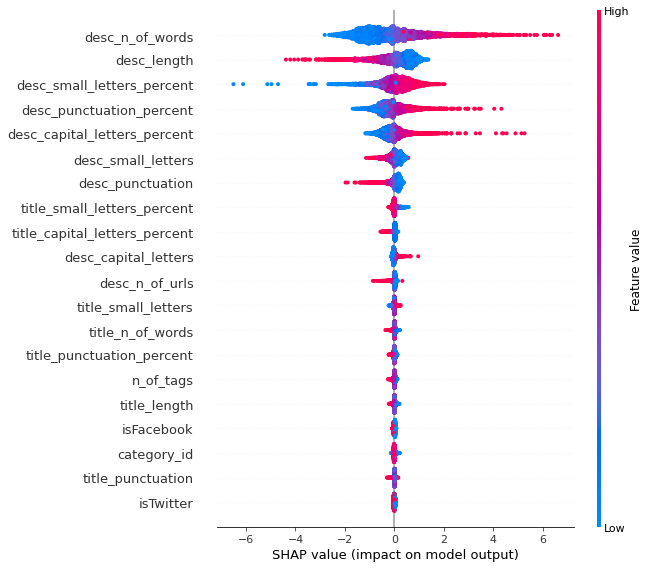

In [19]:
 
shap.summary_plot(shap_values, sample_test_set_not_standarized.iloc[:,:-1], X_test.columns)

In [20]:

sample_id = 222

shap.force_plot(
    explainer.expected_value,
    shap_values[sample_id,:],
    sample_test_set_not_standarized.iloc[sample_id,:-1],
    X_test.columns,
)

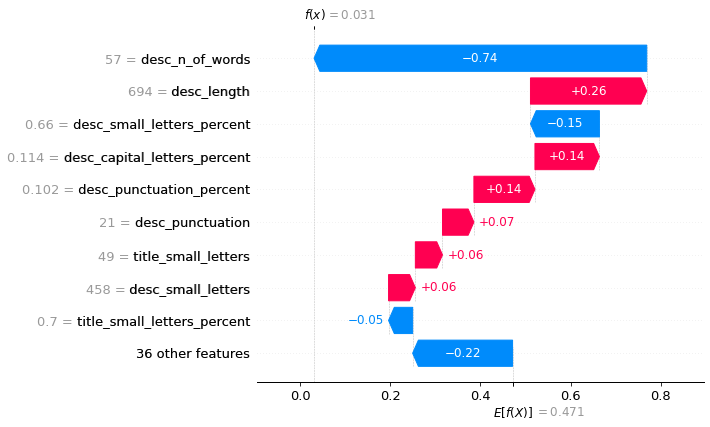

In [22]:
shap.plots._waterfall.waterfall_legacy( explainer.expected_value[0],
                                        shap_values[sample_id],
                                        sample_test_set_not_standarized.iloc[sample_id,:-1],
                                        X_test.columns)

In [23]:
sample_test_set_not_standarized

,category_id,pub_day_of_the_week,pub_day,pub_hour,n_of_tags,title_length,title_n_of_words,title_capital_letters,title_capital_letters_percent,title_small_letters,title_small_letters_percent,title_punctuation,title_punctuation_percent,title_n_of_emojis,desc_length,desc_n_of_words,desc_capital_letters,desc_capital_letters_percent,desc_small_letters,desc_small_letters_percent,desc_punctuation,desc_punctuation_percent,desc_n_of_urls,desc_n_of_emojis,isFacebook,isTwitter,isInstagram,mean_h,mean_s,mean_v,std_h,std_s,std_v,entropy,avg_texts_coordX,avg_texts_coordY,ocr_sentiment_compound,Sad,Fear,Angry,Happy,Neutral,Surprise,people,faces,trending
11925,28,2.0,9.0,6.000000e+00,30.0,47.0,7.0,6.0,0.127660,27.0,0.574468,5.0,0.106383,3.469447e-18,776.0,123.0,65.0,0.083763,525.0,0.676546,18.0,0.048969,4.0,0.0,0,0,0,0.228885,0.124931,0.580314,0.305953,0.216951,0.420357,5.926161,109.833333,190.833333,-3.469447e-18,-5.551115e-17,0.0,0.0,0.0,0.0,0.0,89.0,0.0,1
768,24,4.0,6.0,4.000000e+00,0.0,24.0,4.0,14.0,0.583333,1.0,0.041667,1.0,0.041667,3.469447e-18,17.0,3.0,2.0,0.117647,0.0,0.000000,1.0,0.058824,0.0,0.0,0,0,0,0.211116,0.121069,0.415276,0.191660,0.217380,0.418833,5.292400,217.000000,106.000000,-3.469447e-18,-5.551115e-17,0.0,0.0,1.0,0.0,0.0,4.0,1.0,0
4931,25,3.0,25.0,1.300000e+01,27.0,98.0,17.0,22.0,0.224490,56.0,0.571429,2.0,0.020408,3.469447e-18,1277.0,172.0,179.0,0.140172,827.0,0.647612,30.0,0.060298,8.0,0.0,0,0,0,0.446859,0.350695,0.583564,0.346788,0.325867,0.391406,6.720005,76.000000,289.000000,-3.469447e-18,-5.551115e-17,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
1644,24,5.0,28.0,2.300000e+01,20.0,84.0,15.0,13.0,0.154762,46.0,0.547619,3.0,0.035714,3.469447e-18,170.0,23.0,16.0,0.094118,118.0,0.694118,6.0,0.064706,1.0,1.0,0,0,0,0.448114,0.488677,0.270971,0.384429,0.349090,0.286282,6.199439,-1.000000,-1.000000,-3.469447e-18,-5.551115e-17,2.0,0.0,0.0,0.0,0.0,3.0,2.0,0
3942,24,5.0,10.0,8.000000e+00,27.0,42.0,6.0,6.0,0.142857,29.0,0.690476,2.0,0.047619,3.469447e-18,1518.0,216.0,172.0,0.113307,966.0,0.636364,65.0,0.076416,10.0,0.0,0,0,0,0.404784,0.439769,0.375463,0.320105,0.342719,0.302395,6.629983,292.250000,265.100000,-3.469447e-18,-5.551115e-17,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149,24,3.0,31.0,-3.552714e-15,13.0,56.0,8.0,4.0,0.071429,40.0,0.714286,5.0,0.089286,3.469447e-18,674.0,74.0,42.0,0.062315,478.0,0.709199,53.0,0.094955,2.0,0.0,1,1,0,0.156305,0.310777,0.515249,0.280626,0.256706,0.370383,6.924970,51.000000,274.000000,-3.469447e-18,1.000000e+00,0.0,1.0,0.0,1.0,0.0,6.0,3.0,0
12351,1,2.0,6.0,2.100000e+01,7.0,48.0,9.0,8.0,0.166667,30.0,0.625000,2.0,0.041667,3.469447e-18,172.0,19.0,10.0,0.058140,126.0,0.732558,2.0,0.104651,3.0,0.0,1,1,0,0.333398,0.511811,0.123803,0.333105,0.430095,0.211198,4.558029,289.833333,181.500000,-5.994000e-01,-5.551115e-17,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1
13873,24,4.0,20.0,2.200000e+01,10.0,56.0,7.0,6.0,0.107143,39.0,0.696429,4.0,0.071429,3.469447e-18,950.0,125.0,106.0,0.111579,606.0,0.637895,44.0,0.096842,9.0,0.0,1,1,1,0.206648,0.216627,0.432925,0.289083,0.255127,0.350891,6.859643,-1.000000,-1.000000,-3.469447e-18,-5.551115e-17,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1
1883,24,1.0,19.0,6.000000e+00,19.0,49.0,10.0,7.0,0.142857,30.0,0.612245,2.0,0.040816,3.469447e-18,1498.0,204.0,126.0,0.084112,1026.0,0.684913,36.0,0.056742,9.0,0.0,1,1,1,0.347079,0.333058,0.422460,0.319073,0.299860,0.355979,6.829266,252.535714,176.178571,-5.719000e-01,1.000000e+00,0.0,1.0,0.0,1.0,0.0,4.0,3.0,0


In [24]:
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from pathlib import Path


def save_dependency_plots(shap_values, clf_name, sample_test_set_not_standarized):
    columns = sample_test_set_not_standarized.columns
    for i, col in enumerate(columns):
    #     ax = plt.subplot(n_rows, n_cols, i+1)
        shap.dependence_plot(col, shap_values, sample_test_set_not_standarized, show=False)

        col = col.replace('/', '-')
        path = Path(f"./Shap_plots/{clf_name}/")
        path.mkdir(parents=True, exist_ok=True)

        plt.savefig(str(path) + f"/dependency_{col}.png")
        plt.close()

In [25]:
save_dependency_plots(shap_values=shap_values,
                      clf_name='MLP_selected',
                      sample_test_set_not_standarized=sample_test_set_not_standarized.iloc[:,:-1])   